## Recordatori de Python

#### Enumerate

In [1]:
for a,b in enumerate(['a','b','c']):
    print(a,b)

0 a
1 b
2 c


#### zip

In [2]:
for i in zip([1,2,3],[3,4,5,6]):
    print(i)

(1, 3)
(2, 4)
(3, 5)


#### \*args, \*kwargs o com definir una funció amb un nombre d'arguments arbitrari.

In [3]:
def magic(*args, **kwargs):
    print(args)
    print(kwargs)
    
magic(1,2,3, val1='a', val2='b')

(1, 2, 3)
{'val1': 'a', 'val2': 'b'}


In [4]:
def magic(*a, **b):
    print(a)
    print(b)
    
magic(1,2,3, val1='a', val2='b')

(1, 2, 3)
{'val1': 'a', 'val2': 'b'}


Els operadors prefixes `*` i `**` ens permeten (entre d'altres coses) passar un nombre variable de paràmetres a una funció.

## Descens del gradient d'una funció qualsevol

Suposem que tenim una funcio $f(\mathbf v) = \sum_{i=1}^n v_i^2$ que té per argument un vector de nombres reals $\mathbf v = (v_1, \dots, v_n)$ i que té com a sortida un únic nombre real:

In [5]:
def suma_de_quadrats(v):
    return sum([v_i ** 2 for v_i in v]) 

suma_de_quadrats([2,2,2])

12

L'objectiu és calcular el **paràmetre** $\mathbf{v}$ que maximitza o minimitza aquesta funció, o el que és el mateix, la $\mathbf{v}$ que produeix el valor més alt o més baix possible de $f$. 

Però abans de veure com fer això amb una funció de varies variables, mirem com ho fariem amb una funció d'una variable.

### De les derivades al gradient

Si $f$ és una funció d'una sola variable, la **derivada** de $f$ a un punt $x$ mesura la variació de la funció quan fem un petit canvi a la $x$, i es defineix com el límit de la diferència de dos quocients: 

$$ \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} $$

In [6]:
import math

# LA H DEPÈN DE LA CURVATURA DE LA FUNCIÓ (SI LA 2A DERIVADA ÉS GRAN, CALDRÀ H MÉS PETITA)

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

def quadrat(x):
    return x*x

def dif_quo(x, f=quadrat, h=1e-6):
    return truncate((f(x+h) - f(x))/h, 5)

dif_quo(2.0, quadrat)

4.0

La derivada es defineix com la pendent de la tangent a $(x,f(x))$, concepte que s'iguala a la diferència de quocients quan la $h$ tendeix a 0, però per altres $h$ la diferència de quocients no deixa de ser una aproximació a la pendent de la tangent a $((x+h), f(x+h))$.  

<function matplotlib.pyplot.show(*args, **kw)>

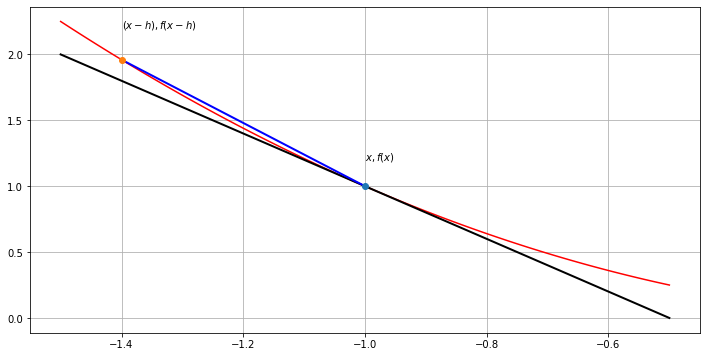

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-1.5,-0.5, 100)
f = [i**2 for i in x]
plt.plot(x,f, 'r-')
plt.plot([-1.5, -0.5], [2, 0.0], 'k-', lw=2)        # x's, y's !!!!!! (d'un segment)
plt.plot([-1.4, -1.0], [1.96, 1.0], 'b-', lw=2)
plt.plot([-1],[1],'o')
plt.plot([-1.4],[1.96],'o')
plt.text(-1.0, 1.2, r'$x,f(x)$')
plt.text(-1.4, 2.2, r'$(x-h),f(x-h)$')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

Hi ha moltes funcions de les quals poden calcular la derivada analíticament, com per exemple $x^2$:

In [7]:
def d_a_quadrat(x):
    # la derivada de x**2 és 2*x
    return 2*x

d_a_quadrat(3.0)

6.0

<function matplotlib.pyplot.show(close=None, block=None)>

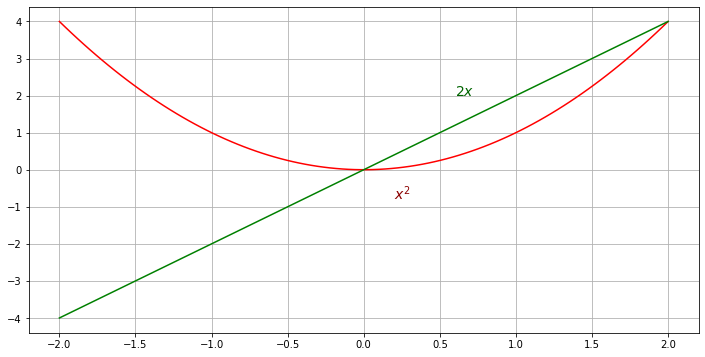

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

font1 = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

font2 = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 14,
        }

x = np.linspace(-2,2, 100)
f = [i**2 for i in x]
df = [2*i for i in x]
plt.text(0.2, -0.8, r'$x^2$', fontdict=font1)
plt.text(0.6, 2.0, r'$2x$', fontdict=font2)
plt.plot(x,f, 'r-')
plt.plot(x,df, 'g-')
plt.gcf().set_size_inches((12,6))
plt.grid()
plt.show

**Però que hem de fer quan no tenim una fòrmula analítica per la derivada?**

Doncs no queda més remei que usar l'aproximació de la diferència de quocients! 

Si el pas és prou petit no notarem la diferència, tot i que el concepte "prou petit" és una mica indefinit: la funció pot variar molt en qualsevol interval i pot requerir una $h$ diferent per zones diferents.

### Gradient 

Quan $f$ és una funció de varies variables, té varies derivades parcials, cada una de les quals indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

La derivada parcial respecte a una variable es pot calcular considerant només canvis en aquella variable i mantenint la resta constants:

In [9]:
def dif_quo_parcial(v, f, i, h=1e-6):
    w = [v_j + (h if j==i else 0) for j, v_j in enumerate(v)]
    return truncate((f(w) - f(v))/h)

El **gradient** de la funció $f$, que és un vector format per les derivades parcials de la funció, ens dóna la **direcció en la qual la funció creix més ràpidament**. 

$$\nabla {f} = (\frac{\partial f}{\partial v_1}, \dots, \frac{\partial f}{\partial v_n})$$

In [10]:
def gradient(v, f, h=1e-6):
    return[dif_quo_parcial(v,f,i,h) for i,_ in enumerate(v)]

def f(v):
    return sum(v_i**2 for v_i in v)

v = [2,2,2]
print(f(v), gradient(v,f))

12 [4, 4, 4]


## Optimització

La forma més simple de trobar el mínim d'una funció és l'algorisme de Nelder-Mead: http://www.benfrederickson.com/numerical-optimization/

Aquest algorisme té com a principal limitació el nombre d'avaluacions que s'han de fer de la funció a cada pas. Com més dimensions té la funció, més avaluacions hem de fer! Això és un limitació molt gran quan treballem amb funcions de moltes dimensions!

<span style="color:green">
LA GRÀCIA DEL GRADIENT - DESCENT ÉS QUE HEM D'AVALUAR POQUES VEGADES LA F / ITERACIÓ, MENTRE QUE AQUEST NECESSITA AVALUAR N+1 VEGADES / STEP (N DIMENSIÓ);
AVALUAR LA FUNCIÓ TÉ UN COST ELEVAT (ÉS LA LOSS, S'HA D'AVALUAR EN TOTES LES DADES CADA COP)
</span>

### Algorisme de descens del gradient

Una estratègia alternativa per minimitzar una funció és repetir la següent estratègia (**algorisme de descens del gradient**):

+ Col·locar-se en una solució potencial aleatòria (un valor aleatori de $\mathbf{v}$)
+ Calcular el vector gradient en aquell punt.
+ Fer un petit pas (variar el valor de $\mathbf{v}$) en la direcció (*contraria*) del vector gradient.

La cerca s'acaba quan el vector gradient és zero o quan el canvi en el valor de $f$ és molt petit. Presumiblement, hem trobat un mínim. 

Si la funció és unimodal (conté un únic mínim), hem trobat una la nostra solució. Sinó, pot ser que estem en un mínim local que no sigui global.

### Com utilitzar el gradient

És fàcil veure que la funció "suma de quadrats", $\sum_i v_i^2$, pren el seu mínim valor quan totes les $v$ són 0. 

Anem a comprovar-ho pel cas de dimensió 3. Per fer-ho, encara ens cal una funció que varii el valor de $\mathbf v$ en la direcció contrària del gradient, que anomenarem ``pas``: 

In [11]:
def gradient_suma_quadrats(v):
    return [2 * v_i for v_i in v]
    
def pas(v,grad,mida_pas):
    return [v_i - mida_pas * dir_i for v_i, dir_i in zip(v,grad)]

Començarem escollint un valor a l'atzar i llavors anirem movent-nos en la direcció contrària al gradient. 

Ens aturarem quan el canvi en el valor de la funcio sigui *prou petit*. 

Implementarem el concepte *prou petit* amb aquesta funció:

In [12]:
import random
import numpy as np

def distancia(v1,v2):
    import numpy as np
    import math
    v = np.array(v1)-np.array(v2)
    return math.sqrt(sum(v_i ** 2 for v_i in v))

v = [random.randint(-10,10) for i in range(3)]
v

[6, 3, 5]

In [13]:
tolerancia = 1e-15
while True:
    gradient = gradient_suma_quadrats(v)
    next_v = pas(v,gradient,0.01)
    if distancia(next_v,v) < tolerancia:
        break
    v = next_v
print(v)


[3.522459623002587e-14, 1.7612298115012935e-14, 2.935383019168828e-14]


### El pas

La **mida del pas** és un aspecte delicat: si és massa petita avançarem massa lentament; si és massa gran, podem perdre el màxim (mínim) ques estem buscant. 

Per tant, a l'hora de triar la mida del pas hem de considerar quina política seguir:

+ Fer servir una mida de pas constant. En aquest cas la mida del pas defineix la precisió de la solució.
+ Anar disminuint la mida del pas a mesura que passa el temps.
+ A cada pas, cercar la mida que minimitza el valor de funció objectiu.

La darrera opció és bona però molt cara. El màxim que podriem fer és considerar un conjunt fix de mides.

In [14]:
mides_pas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

### Plantejament general d'un problema d'aprenentatge

En general, tenim els següents elements:

+ Un conjunt de dades $(\mathbf x,y)$. 
+ Una funció objectiu *target_f*, que volem minimitzar, que representa la discrepància entre les dades i un model.
+ La funció que representa el gradient de la funció objectiu, *gradient_f*. 


El cas més normal és que *target_f*  representi els errors d'un model $M$ de representació de les dades $(x_i, y_i)$, en funció dels seus paràmetres $w$, i volem trobar els paràmetres que minimitzen l'error:

$$ f = \sum_{i} (y_i - M(\mathbf x_i,w))^2 $$

Per exemple, $(x,y)$ pot representar:

+ $x$: el comportament d'un jugador de "Candy Crush"; $y$: les compres mensuals que fa de "vides". 
+ $x$: les dades de funcionament del motor d'un cotxe; $y$: la probabilitat d'un error de funcionament del motor.
+ $x$: les dades financeres d'un client d'un banc; $y$: la seva qualificació (si/no) per un préstec.

> El cas que $y$ és un valor real, el problema s'anomena *regressió*.

> El cas que $y$ és un valor binari o categòric, el problema s'anomena *classificació*. 

Llavors els descens del gradient es pot implementar així:

In [ ]:
# Les dades de la funció y = 2x serien del tipus:
x = [1,2,3,4]
y = [2,4,6,8]

def minimitza_batch(target_f, gradient_f, x, y, theta_inicial, toler = 1e-6):
    
    mides_pas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_inicial
    target_f = safe(target_f)
    valor = target_f(x,y,theta)
    
    while True:
        gradient = gradient_f(theta)
        next_thetas = [pas(theta, gradient, -pas) for mida_pas in mides_pas]
        next_theta = min(next_thetas, key = target_f)
        next_valor = target_f(x,y,next_theta) # Car!!!! (per exemple, 1M de imatges de 1.000 x 1.000)
        if abs(valor - next_valor) < toler:
            return theta
        else:
            theta, valor = next_theta, next_valor

**Observació:** Aquesta funció avalua a cada pas la funció $f$ tal i com està definida, és a dir, necessita **totes** les dades $(x_i,y_i)$ a cada iteració. 

### Descens del gradient estocàstic

**Si el volum de dades és molt gran aquesta estratègia no és viable**. 

#### Convergència en probabilitat? A cada pas només cal avaluar 1 element random

La funció d'error que estem avaluant quan aprenem un model a partir de dades és de tipus additiu: es construeix a partir de la suma dels errors de cada una de les dades respecte del model.

En aquest cas podem usar la tècnica Stochastic Gradient Descend (SGD), que consisteix en calcular el gradient (i fer un pas en la direcció del mínim) a partir de l'estimació d'**una única dada** (o d'un conjunt petit de dades o *minibatch*). 

En aquest exemple farem servir un pas adaptatiu: si no observem millora en el valor de la funció anem fent petit el pas.

Una de les condicions d'aquest algorisme (per assegurar que convergim al mínim) és que a cada cicle iterarem sobre les dades en **ordre aleatori**:

In [ ]:
x = [1,2,3,4]
y = [2,4,6,8]
dades = list(zip(x,y))

def in_random_order(dades):
    import random
    indexes = [i for i,_ in enumerate(dades)]
    random.shuffle(indexes)
    for i in indexes:
        yield dades[i]

In [ ]:
for (x_i,y_i) in in_random_order(dades):
    print(x_i,y_i) 

3 6
4 8
2 4
1 2


In [ ]:
def vector_subtract(v,w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c,v):
    return [c * v_i for v_i in v]

def SGD(target_f, gradient_f, x, y, theta_0, alpha_0=0.01):
    dades = zip(x,y)
    theta = theta_0 # valor inicial dels paràmetres
    alpha = alpha_0 # pes del gradient
    min_theta, min_valor = float('inf'), float('inf')
    iteracions_sense_millora = 0 
    # iterem fins que no millorem el valor de la funció durant 100 iteracions
    while iteracions_sense_millora < 100:
        # calculem el valor de la funció
        valor = sum(target_f(x_i, y_i, theta) for x_i,y_i in dades)
        if valor < min_valor: # si el valor de la funció ha baixat, actualitzem
            min_theta, min_valor = theta, valor
            iteracions_sense_millora = 0
            alpha = alpha_0
        else: # sinó, activem un comptador de paciència i fem el pas més petit
            iteracions_sense_millora += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(dades): # cambien els paràmetres en funció del gradient
            gradient_i = gradient_f(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

## Gradient Descent i Regressió Lineal



El model de regressió lineal assumeix una relació entre les dades i el model d'quest tipus:

$$ y_i = \beta x_i + \alpha $$

In [ ]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

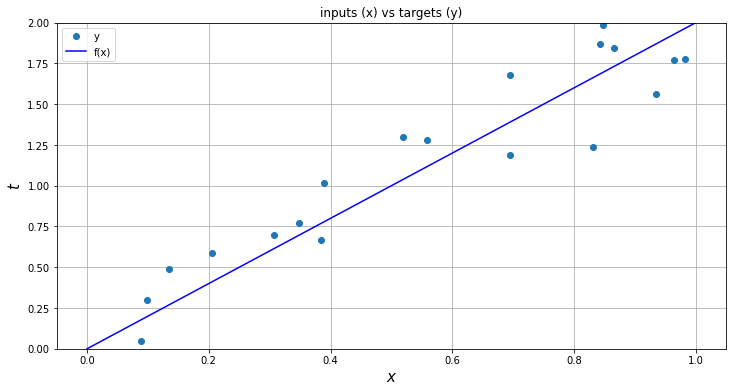

In [ ]:
plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()

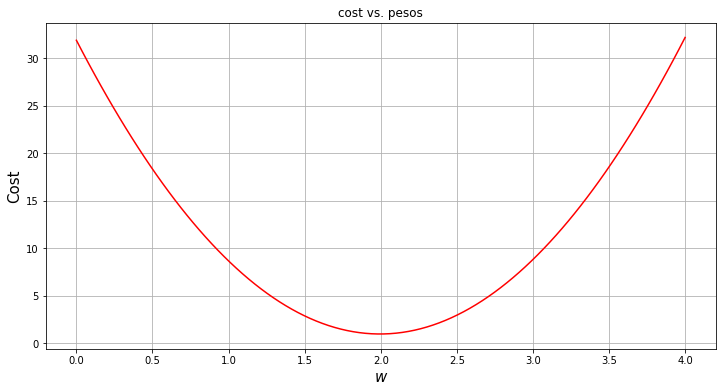

In [ ]:
# El nostre model y = x * w
def nn(x, w): return x * w

# Definim la funció de cost
def cost(y, t): return ((t - y)**2).sum()

# Definim un vector de possibles valors d'aquesta funció 
ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(nn(x, w) , y))(ws)  

# Plot
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('cost vs. pesos')
plt.grid()
plt.gcf().set_size_inches((12,6))
plt.show()

In [ ]:
def gradient(w, x, y): 
    return 2 * x * (nn(x, w) - y)

# definim un pas
def delta_w(w_k, x, y, learning_rate):
    return learning_rate * gradient(w_k, x, y).sum()

# valor inicial del paràmetre
w = 0.1

#learning_rate = 0.1
learning_rate = 0.02
#learning_rate = 0.001


nb_of_iterations = 15  
w_cost = [(w, cost(nn(x, w), y))] 
for i in range(nb_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    w_cost.append((w, cost(nn(x, w), y)))  

for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 28.8943
w(1): 0.6899 	 cost: 14.2027
w(2): 1.0962 	 cost: 7.2334
w(3): 1.3760 	 cost: 3.9274
w(4): 1.5688 	 cost: 2.3591
w(5): 1.7015 	 cost: 1.6152
w(6): 1.7929 	 cost: 1.2623
w(7): 1.8559 	 cost: 1.0949
w(8): 1.8993 	 cost: 1.0155
w(9): 1.9292 	 cost: 0.9778
w(10): 1.9497 	 cost: 0.9599
w(11): 1.9639 	 cost: 0.9514
w(12): 1.9737 	 cost: 0.9474
w(13): 1.9804 	 cost: 0.9455
w(14): 1.9850 	 cost: 0.9446
w(15): 1.9882 	 cost: 0.9442


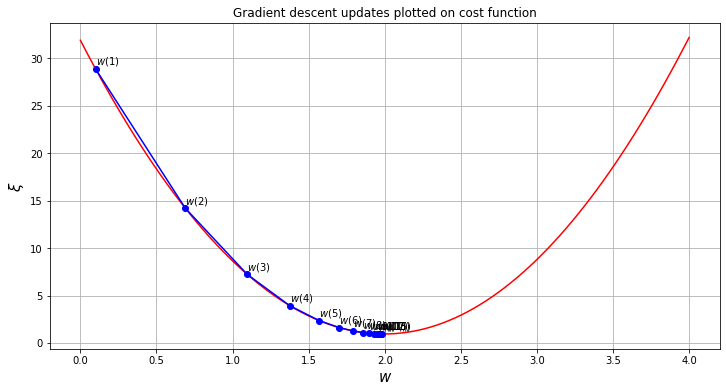

In [ ]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(1, len(w_cost)-2):
    w1, c1 = w_cost[i-1]
    w2, c2 = w_cost[i]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Plot the last weight, axis, and show figure
w1, c1 = w_cost[len(w_cost)-3]
plt.plot(w1, c1, 'bo')
plt.text(w1, c1+0.5, '$w({})$'.format(nb_of_iterations))  
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.gcf().set_size_inches((12,6))
plt.show()

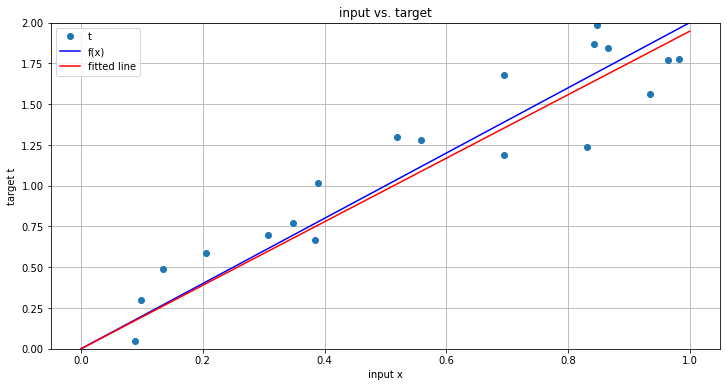

In [ ]:
w = 0
nb_of_iterations = 10  
for i in range(nb_of_iterations):
    dw = delta_w(w, x, y, learning_rate)  
    w = w - dw  
    

plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((12,6))
plt.show()